In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost
%matplotlib inline

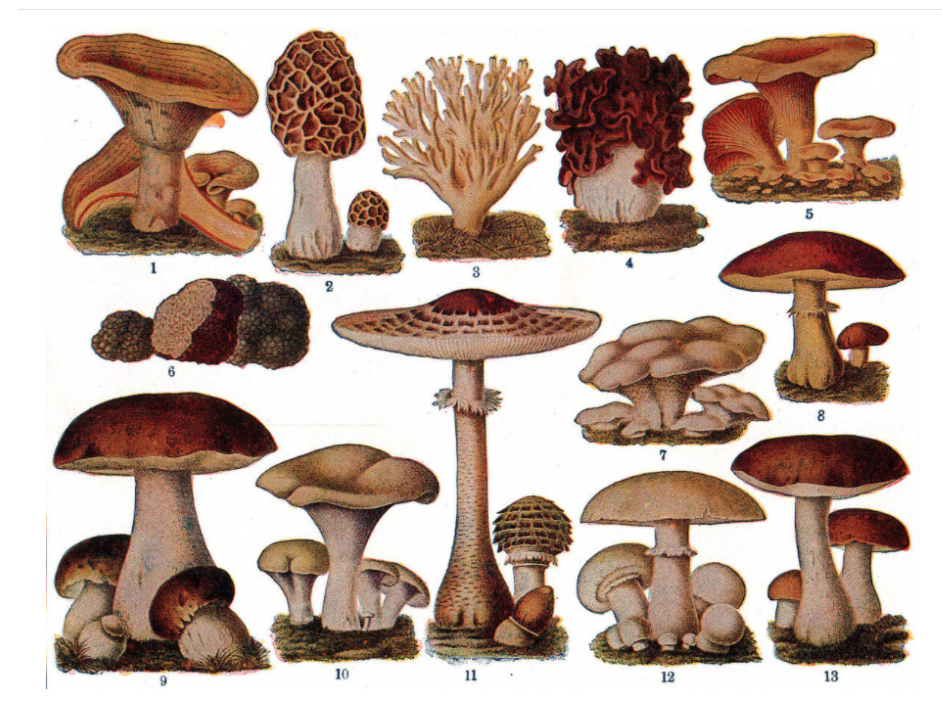

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
# Importing the dataset

dataset = pd.read_csv('mushrooms.csv')

In [4]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# Viewing the first five rows of dataset

dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
# We can see all the columns have categorical value.
# We have 22 features (independent variables) and a dependent variable (class).

# We will continue with data preprocessing but lets get some insights of the dataset first.

In [6]:
labelEncoder = preprocessing.LabelEncoder()
for col in dataset.columns:
    dataset[col] = labelEncoder.fit_transform(dataset[col])

# Splitting test train set, with 20% of the data as the validation set
train, test = train_test_split(dataset, test_size = 0.2) 

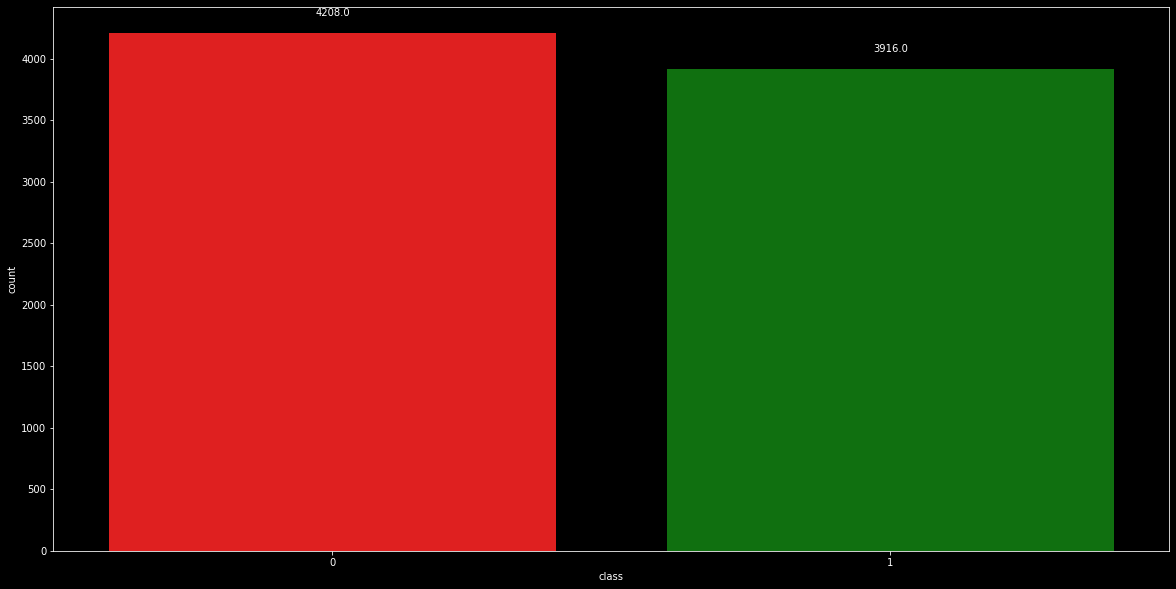

In [8]:
# Visualising the number of mushrooms that fall in each class - p = poisonous, e=edible
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=20,10 
s = sns.countplot(x = "class", data = dataset,palette=["red","green"])
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 20), 
                textcoords = 'offset points')
plt.show()

In [21]:
# In the given dataset we have 3916 poisonous mushrooms and 4208 edible mushrooms

In [9]:
features = dataset.columns
print(features)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


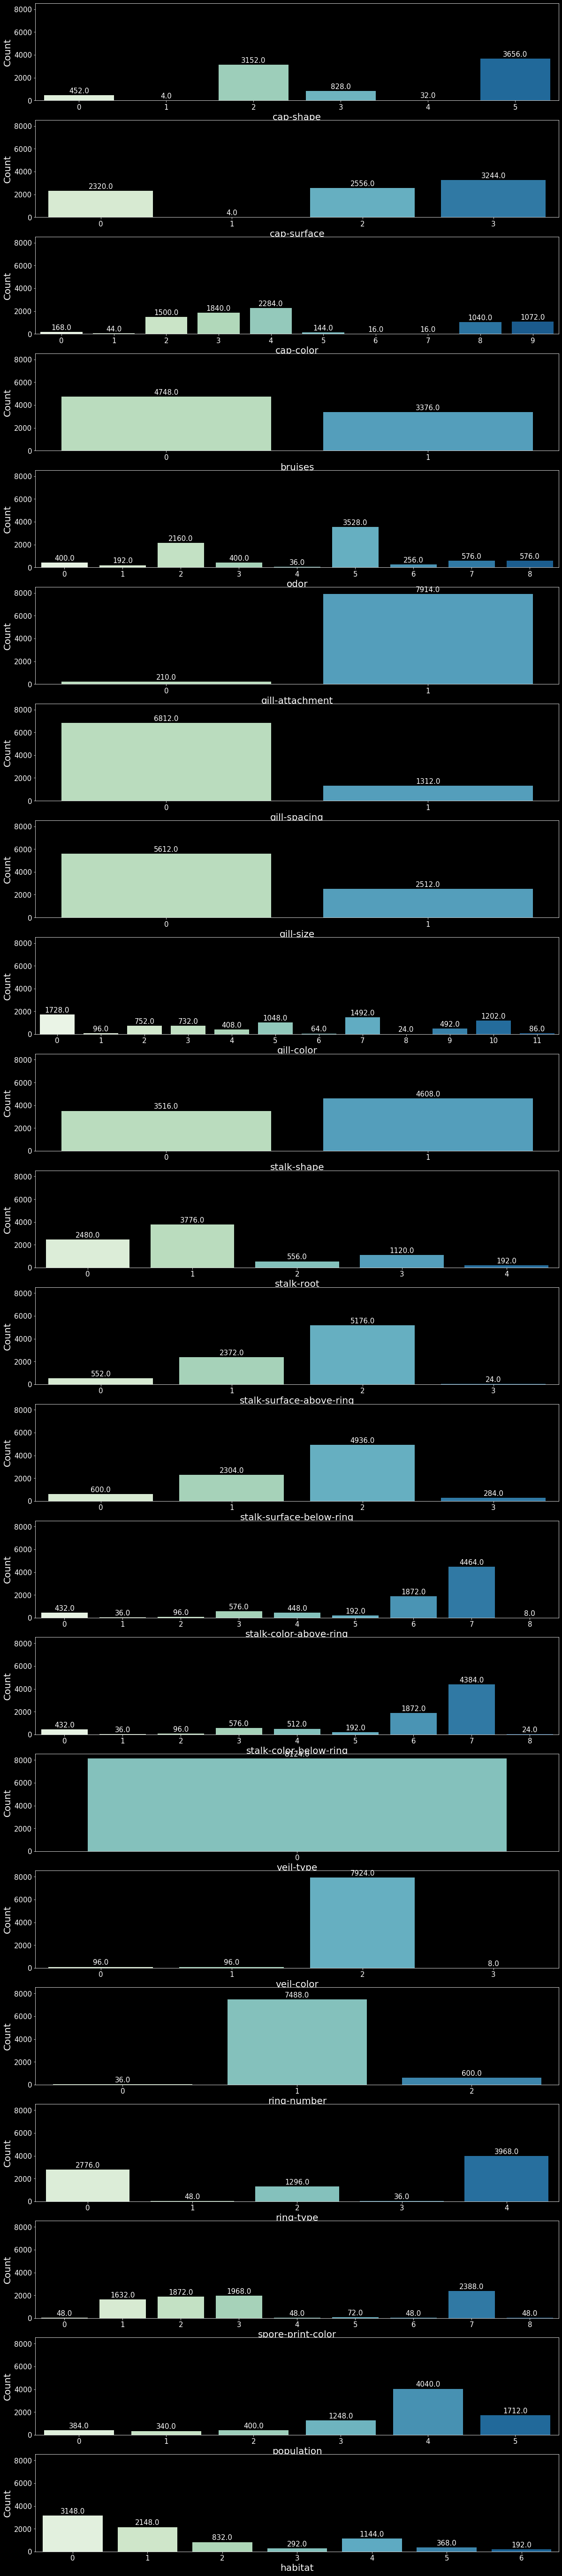

In [10]:
f, axes = plt.subplots(22,1, figsize=(20,100), sharey = True) 
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = dataset, ax=axes[i], palette = 'GnBu')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

In [28]:
# From above graph we can see how many mushrooms belong to each category in each feature 

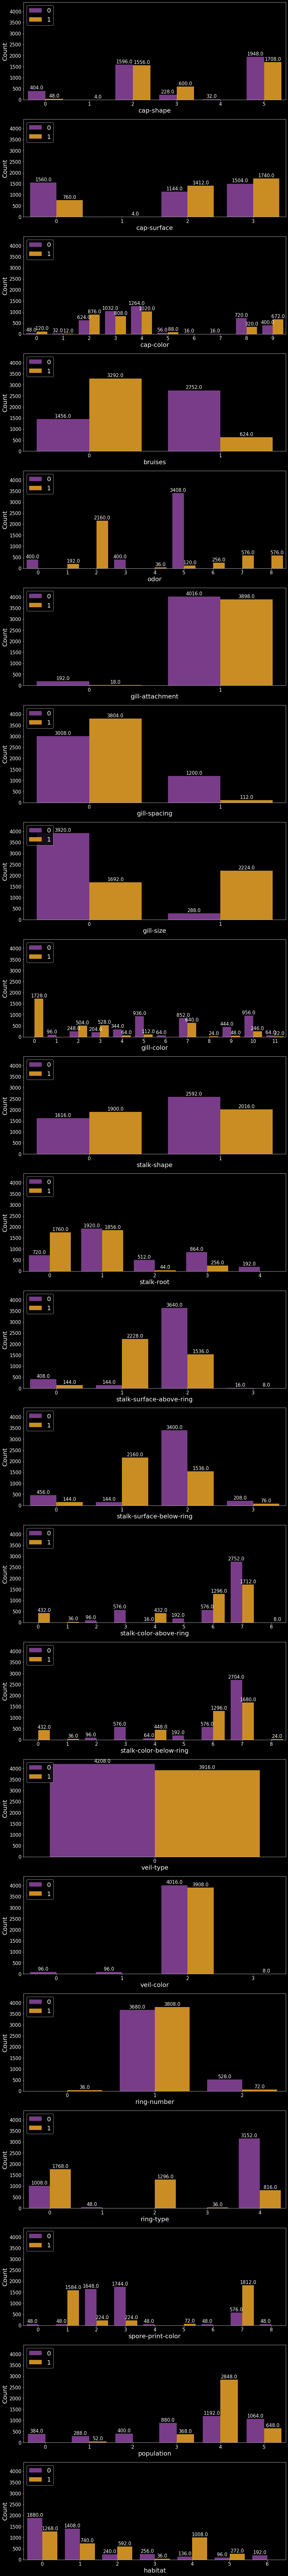

In [11]:
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = dataset, hue = 'class', ax=axes[i], palette = 'CMRmap')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    axes[i].legend(loc=2, prop={'size': 20})
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

In [30]:
# From above graph we can see how many mushrooms belong to each category in each feature and among those how many are edible and how many are 
# poisonous mushrooms.

In [12]:
# Train set
train_y = train['class']
train_x = train[[x for x in train.columns if 'class' not in x]]
# Test/Validation set
test_y = test['class']
test_x = test[[x for x in test.columns if 'class' not in x]]

models = [SVC(kernel='rbf', random_state=0), SVC(kernel='linear', random_state=0), XGBClassifier(), LogisticRegression()]
model_names = ['SVC_rbf', 'SVC_linear', 'xgboost', 'Logistic Regression']
for i, model in enumerate(models):
    model.fit(train_x, train_y)
    print ('The accurancy of ' + model_names[i] + ' is ' + str(accuracy_score(test_y, model.predict(test_x))) )

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accurancy of SVC_rbf is 1.0
The accurancy of SVC_linear is 0.9667692307692307
The accurancy of xgboost is 1.0
The accurancy of Logistic Regression is 0.9526153846153846


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


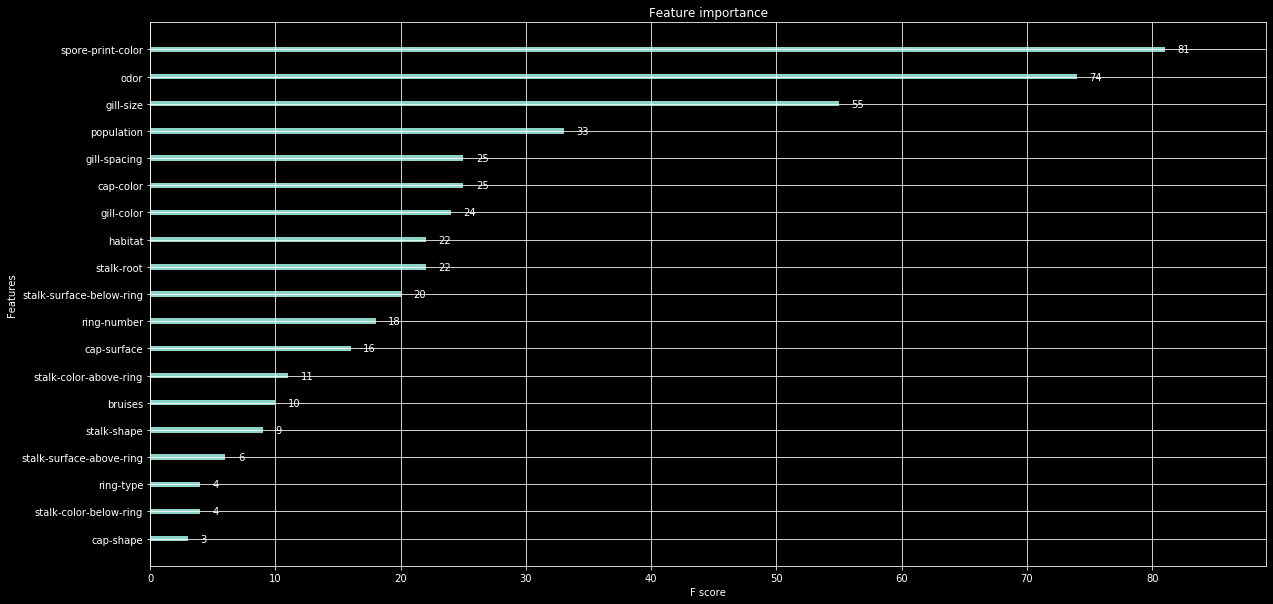

In [13]:
ax = xgboost.plot_importance(models[2])

The dataset seems really straight forward, with the problem being very much linear in nature as both Logistic regression and SVM with a linear kernel had accuracy of more than 90%.

